Data cleaning, analysis and visualization in Python using Jupyter Notebooks.

Importing the necessary libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Acquiring the data from the CSV file.

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

The data at first glance

In [3]:
#First 5 rows of the dataframe
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Number of rows and columns
netflix.shape

(8807, 12)

In [5]:
#Statistical summary of our data
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Now that our data has been imported correctly and we've taken a look at it, we can start noticing a few problems which may skew our analysis process:

1.Null values are present in a few columns. Let's get the percentage of null values for each column:

In [7]:
percentages = netflix.isnull().mean()*100
null_columns = round(percentages[percentages > 0], 2)
null_columns.sort_values(ascending=False, inplace=True)
null_columns

director      29.91
country        9.44
cast           9.37
date_added     0.11
rating         0.05
duration       0.03
dtype: float64

We can clearly tell there will be a problem when performing our analysis since more than a quarted of the "director" column is filled with null values, and almost 10% of the "country" and "cast" columns are null as well.

To fix this, we will fill these columns with an empty string value (""), since this will not affect our charts and plots.

However, we can see a small percentage of missing values in the "date_added", "duration" and "rating" columns as well. Since these will make a large part of our plots, we shall remove the rows that containg null values in these columns in order to not skew with our analysis.

In [8]:
#Filling in the null values
netflix[['director', 'country', 'cast']].dtypes

director    object
country     object
cast        object
dtype: object

In [9]:
netflix[['director', 'country', 'cast']] = netflix[['director', 'country', 'cast']].fillna("Unknown")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Now that we have filled in the missing values for these columns, we need to do something about the rest. Since filling them as well would skew our plots and there is a very small amount of data missing, we will drop the rows that contain missing data in the "date_added", "duration" and "rating" columns.

In [10]:
netflix.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Since these are the only columns that still have null values, we can drop the rows as follows:

In [11]:
netflix.dropna(inplace=True)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [12]:
netflix.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

Now that our data is free of null values, we should start cleaning the not-null values.

In [13]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Removing the trailing whitespaces from all of the string and mixed columns.

In [14]:
for i in netflix.columns:
    if netflix[i].dtype=='O':
        netflix[i] = netflix[i].str.strip()
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
netflix['date_added'].dtype

dtype('O')

Taking a look at the "date_added" column, we can see it is of type 'object' meaning it's a string. We will separate the column into 2 distinct columns: one for the year and one for the month.

In [16]:
from datetime import datetime
years = []
months = []
for i in range(len(netflix)):
    date = netflix['date_added'].iloc[i]
    date = datetime.strptime(date, "%B %d, %Y")

    years.append(date.year)
    months.append(date.month)

if 'year_added' not in netflix.columns and 'month_added' not in netflix.columns:
    netflix.insert(7, 'year_added', years, allow_duplicates=True)
    netflix.insert(8, 'month_added', months, allow_duplicates=True)
netflix.head()

,show_id,type,title,director,cast,country,date_added,year_added,month_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2021,9,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,9,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,9,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,9,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,9,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Now that our "date_added" columns has been cleaned, we need to take a look at the other columns to see which ones containt corrupted values. We'll start with the "type" column.


In [17]:
netflix.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

We can see the column is formatted correctly as there can only be Movies and TV Shows as the values. We will later separate the dataframe into 2 subsets, one for each type, but for now, we have to finish the cleaning process.

Now we will have a look at the rating column


In [18]:
netflix.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

All of these are viable values for a "rating" column. This means we are almost finised with the data cleaning. All that is left to do is to examine the "duration" column and partition the dataset accordingly into movies and TV shows. 

In [19]:
(netflix['duration'].str.contains('min') == (netflix['type'] == 'Movie'))

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Length: 8790, dtype: bool

Our hypothesis is that every entry in the dataset that is listed as a movie in the "type" column will have a duration listed in the number of minutes. We will test if this is true for every entry in the dataset down below.

In [20]:
(netflix['duration'].str.contains('min') == (netflix['type'] == 'Movie')).all()


True

It seems we were correct, we will now do the same thing for the TV shows, testing if every TV show's meassure unit in the "duration" column is the number of seasons.

In [21]:
(netflix['duration'].str.contains('Season') == (netflix['type'] == 'TV Show')).all()


True

Perfect, this means that splitting our dataset into movies and TV shows is as simple as this.

In [22]:
movies = netflix.groupby('type').get_group('Movie')
movies

,show_id,type,title,director,cast,country,date_added,year_added,month_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2021,9,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,9,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",2021,9,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,9,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,9,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2016,3,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2019,11,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2019,11,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2020,1,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [23]:
shows = netflix.groupby('type').get_group('TV Show')
shows

,show_id,type,title,director,cast,country,date_added,year_added,month_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,9,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,9,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,9,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,9,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,9,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2018,5,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2017,1,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2018,9,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2016,12,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


To test if the records have been grouped correctly, we can do the following:

In [24]:
movies['type'].value_counts()

Movie    6126
Name: type, dtype: int64

In [25]:
shows['type'].value_counts()

TV Show    2664
Name: type, dtype: int64

In [26]:
len(netflix) == len(shows) + len(movies)

True

Ok, we have our records split into movies and TV shows correctly, now to clean up the "duration" column accordingly.

In [27]:
if 'duration' in movies.columns:
    duration_list = movies['duration'].str.split()
    duration_list = [i[0] for i in duration_list]
    movies.iloc[0:, 11] = duration_list
movies = movies.rename(columns = {'duration': 'length'})
movies



,show_id,type,title,director,cast,country,date_added,year_added,month_added,release_year,rating,length,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2021,9,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,9,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",2021,9,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,9,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,9,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2016,3,2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2019,11,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2019,11,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2020,1,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


And now we will do the same for our TV shows.


In [28]:
if 'duration' in shows.columns:
    duration_list = shows['duration'].str.split()
    duration_list = [i[0] for i in duration_list]
    shows.iloc[0:, 11] = duration_list
shows = shows.rename(columns = {'duration': 'number_of_seasons'})
shows

,show_id,type,title,director,cast,country,date_added,year_added,month_added,release_year,rating,number_of_seasons,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,9,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,9,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,9,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,9,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,9,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2018,5,2015,TV-Y7,2,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2017,1,2016,TV-PG,2,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2018,9,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2016,12,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


Perfect! Our data is sparkling clean and now it's time for the analysis to begin. In order to get a better understanding of the data we have to work with, we will first plot how Netflix has evolved in terms of content over the last decade.

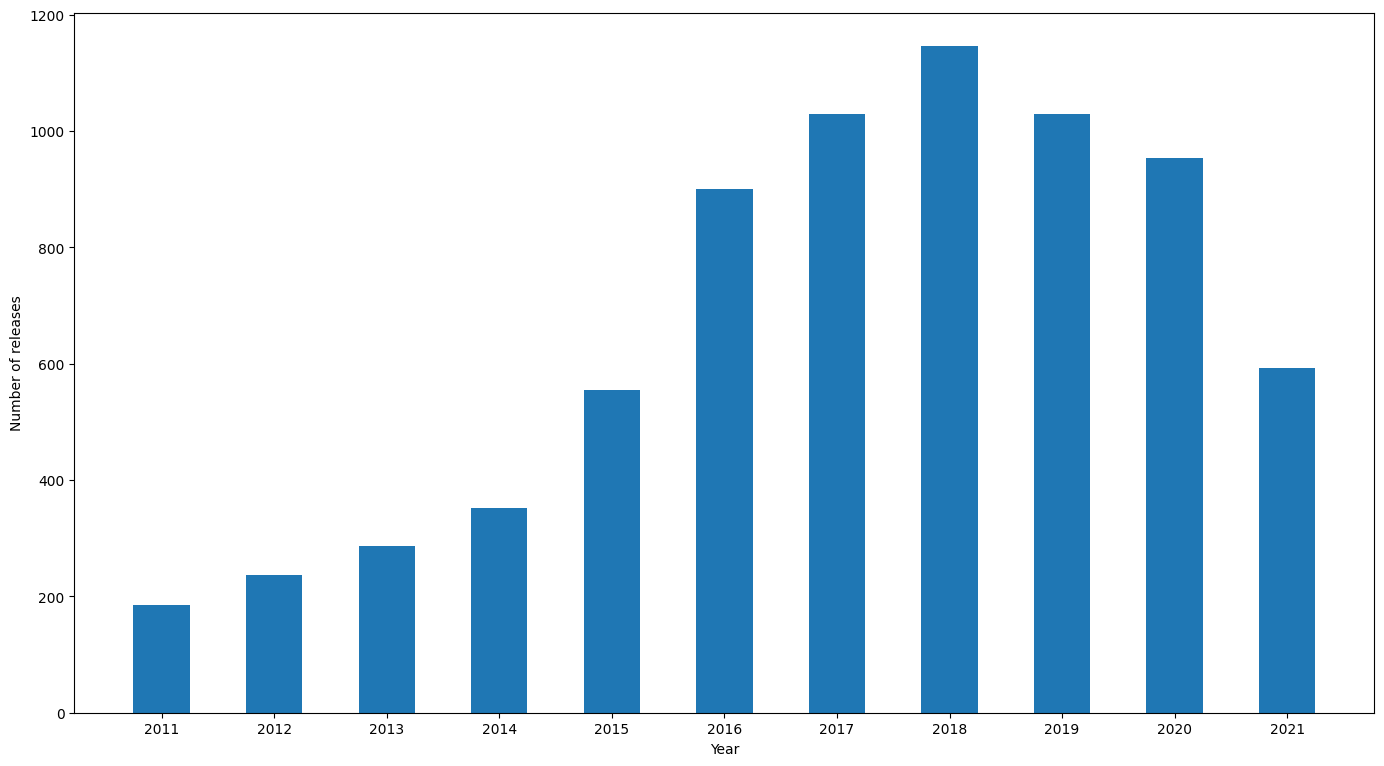

In [29]:
fig = plt.figure(figsize=(13, 7))
releases = netflix[netflix.release_year >= 2011].release_year.value_counts().sort_index()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(2011, 2022), releases, width=0.5)
ax.set_xticks(np.arange(2011, 2022))
ax.set_xlabel('Year')
ax.set_ylabel('Number of releases')
plt.show()


Let us evaluate our findings. From the graphs we can tell Netflix has been steadily growing its library of both Movies and TV shows, reaching over 6x as many titles in 2018 compared to 2011, and this number has remained almot constant through 2019 and 2020. 

Presumably, due to the pandemic, the number of titles released in 2021 is significantly lower than the last few years, however.

And now let us compare the number of released movies vs TV shows in the last decade.

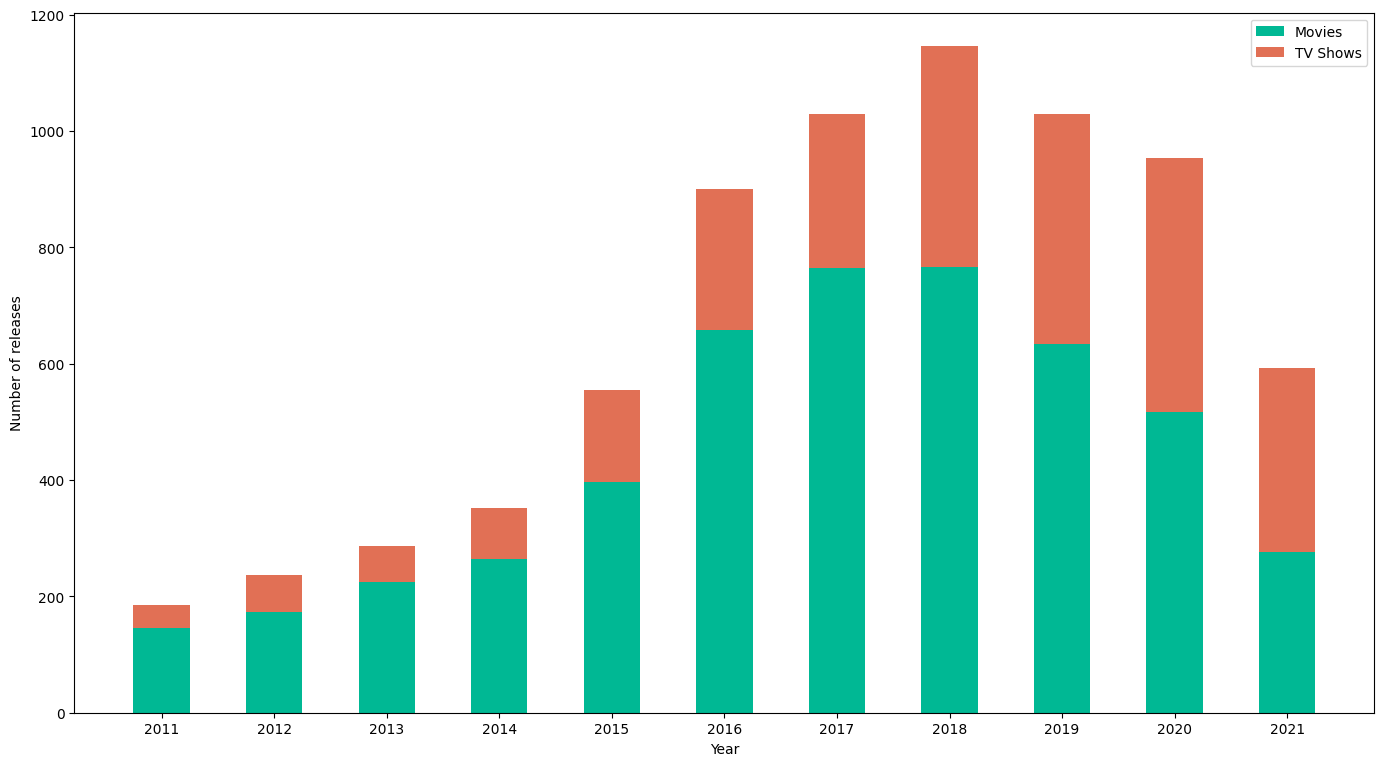

In [30]:
fig = plt.figure(figsize=(13, 7))
movie_releases = movies[movies.release_year >= 2011].release_year.value_counts().sort_index()
show_releases = shows[shows.release_year >= 2011].release_year.value_counts().sort_index()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(2011, 2022), movie_releases, width=0.5, color='#00b894', label='Movies')
ax.bar(np.arange(2011, 2022), show_releases, width=0.5, color='#e17055', bottom = movie_releases, label='TV Shows')
ax.set_xticks(np.arange(2011, 2022))
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Number of releases')
plt.show()

Interesting, it seems like the proportion of TV shows compared to movies has significantly grown over the last decade, reaching almost a perfect balance between the 2.

In fact, let's visualize the proportion of TV Shows compared to movies. 

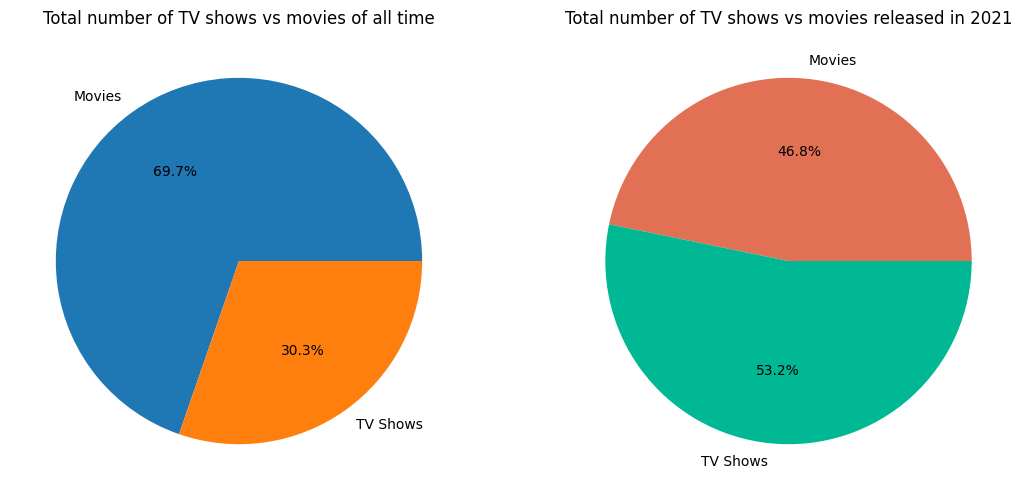

In [31]:
fig, (a1, a2) = plt.subplots(1,2, figsize=(13, 7))
a1.pie([len(movies), len(shows)], labels=['Movies', 'TV Shows'], autopct='%1.1f%%')
a1.set_title('Total number of TV shows vs movies of all time')
a2.pie([len(movies[movies.release_year == 2021]), len(shows[shows.release_year == 2021])], labels=['Movies', 'TV Shows'], colors=['#e17055', '#00b894' ] , autopct='%1.1f%%')
a2.set_title('Total number of TV shows vs movies released in 2021')
plt.show()

While the number of movies is still overall larger than the number of TV shows, we can see a trend towards more TV shows being added to the platform instead of movies.

Now it's about time we took a look at the "country" column to see what are the most common places for movie and TV show production.

In [32]:
netflix['country']

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8790, dtype: object

We can see there are titles which have been produced in multiple countries, thus, we need to separate them into the corresponding countries.

In [33]:
def get_country_values(df):
    country_values = pd.Series(dtype=int)
    for c_list in df.country:
        c_list = c_list.split(",")
        for c in c_list:
            c = c.strip()
            if c != 'Unknown':
                if c in country_values.index:
                    country_values[c] +=1
                else:
                    country_values[c] = 1
    return country_values

In [34]:
print(get_country_values(netflix))

United States    3681
South Africa       62
India            1046
Ghana               5
Burkina Faso        1
                 ... 
Sudan               1
Panama              1
Uganda              1
East Germany        1
Montenegro          1
Length: 123, dtype: int64


Perfect, now we know the exact amount of movies and shows produced in each country, we will move on to visualizing this data.

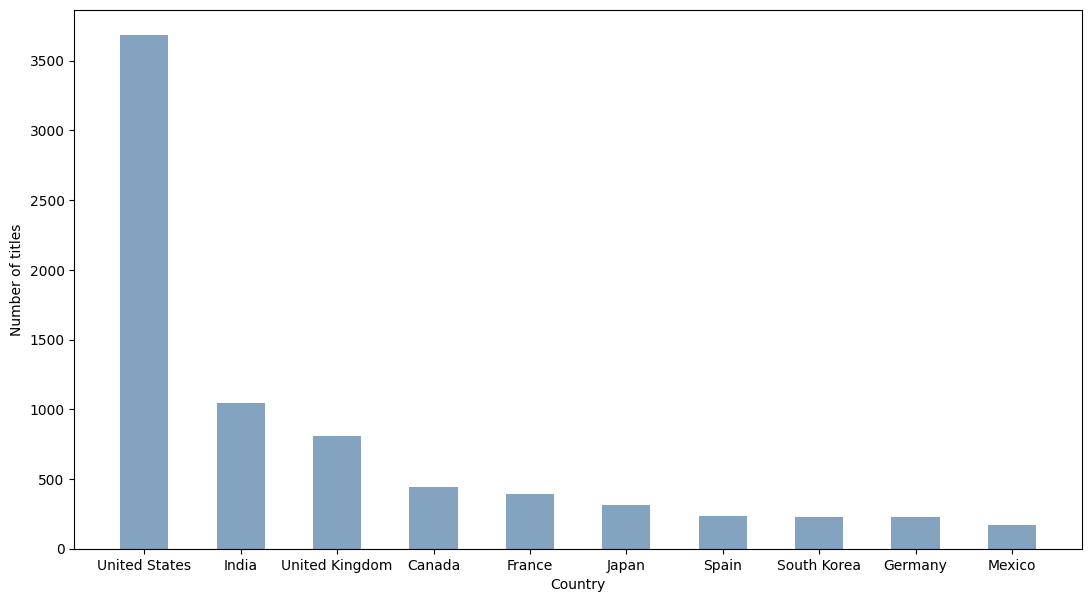

In [35]:
total_countries = get_country_values(netflix)
total_countries.sort_values(ascending=False, inplace=True)
top_10_countries = total_countries[:10]

fig, ax = plt.subplots(figsize=(13, 7))
ax.bar(top_10_countries.index, top_10_countries, width = 0.5, color=(0.2, 0.4, 0.6, 0.6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of titles')
plt.show()

And let's see what are the countries which produce the most movies vs TV shows.

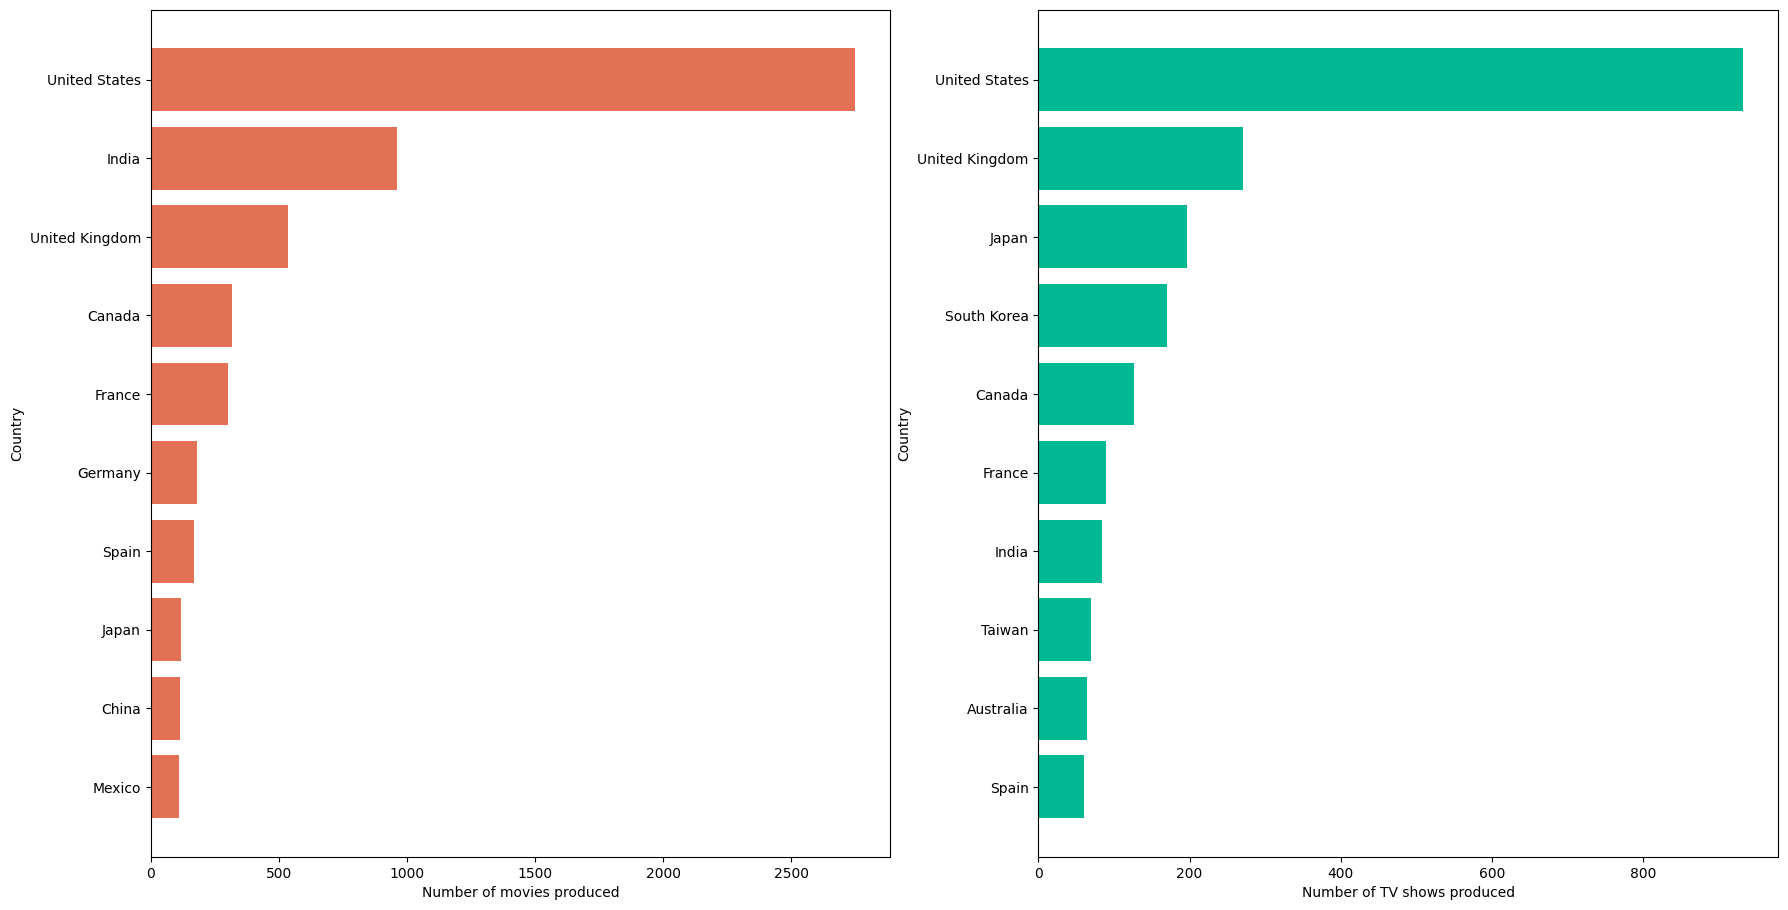

In [36]:
movie_countries = get_country_values(movies).sort_values(ascending = False)[:10]
show_countries = get_country_values(shows).sort_values(ascending = False)[:10]

fig, (a1, a2) = plt.subplots(1, 2, figsize = (21, 11))
a1.barh(movie_countries.index[::-1], movie_countries[::-1], color = '#e17055')
a1.set_xlabel('Number of movies produced')
a1.set_ylabel('Country')
a2.barh(show_countries.index[::-1], show_countries[::-1], color = '#00b894')
a2.set_xlabel('Number of TV shows produced')
a2.set_ylabel('Country')
plt.show()

To end the analysis right, we shall visualize the correlation between the countries where movies and TV shows have been produced and their respective ratings.

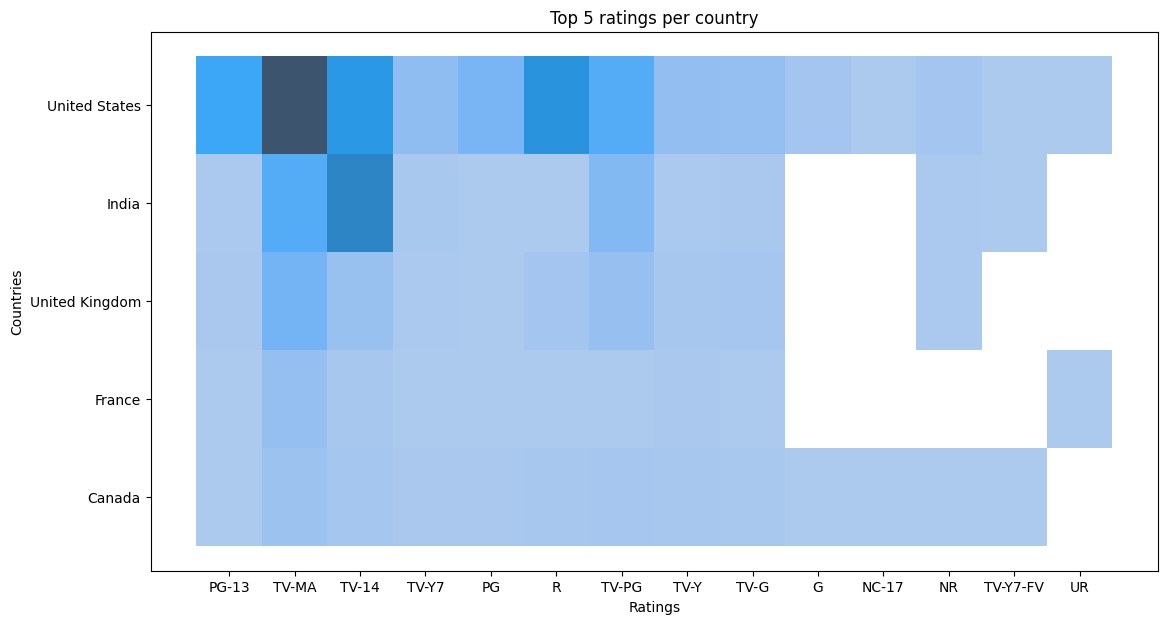

In [37]:
plt.figure(figsize=(13, 7))
top_countries = get_country_values(netflix).sort_values(ascending = False).index[:5]
g = sns.histplot(x = 'rating', y='country', data=netflix[netflix["country"].isin(top_countries)])
g.set_xlabel("Ratings")
g.set_ylabel("Countries")
g.set_title("Top 5 ratings per country")
plt.show()